In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from networkx.drawing.layout import spring_layout
from IPython.display import HTML
import warnings
warnings.simplefilter('ignore')

%matplotlib notebook

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Нажмите чтобы отобразить/скрыть код."></form>''')

# Задача о кратчайшем пути
<br>&#8195;&#8195;Зада́ча о кратча́йшем пути́ — задача поиска самого короткого пути (цепи) между двумя точками (вершинами) на графе, в которой минимизируется сумма весов рёбер, составляющих путь.
<br>&#8195;&#8195;Задача о кратчайшем пути является одной из важнейших классических задач теории графов. Сегодня известно множество алгоритмов для её решения.
<br>&#8195;&#8195;У данной задачи существуют и другие названия: задача о минимальном пути или, в устаревшем варианте, задача о дилижансе.
<br>&#8195;&#8195;Значимость данной задачи определяется её различными практическими применениями. Например, в GPS-навигаторах осуществляется поиск кратчайшего пути между точкой отправления и точкой назначения. В качестве вершин выступают перекрёстки, а дороги являются рёбрами, которые лежат между ними. Если сумма длин дорог между перекрёстками минимальна, тогда найденный путь самый короткий.

## Алгори́тм Де́йкстры
<br>&#8195;&#8195;Алгори́тм Де́йкстры — алгоритм на графах, изобретённый нидерландским учёным Эдсгером Дейкстрой в 1959 году. Находит кратчайшие пути от одной из вершин графа до всех остальных. Алгоритм работает только для графов без рёбер отрицательного веса.

Заведём массив d[], в котором для каждой вершины v будем хранить текущую длину d[v] кратчайшего пути из s в v. Изначально d[s]=0, а для всех остальных вершин эта длина равна бесконечности (при реализации на компьютере обычно в качестве бесконечности выбирают просто достаточно большое число, заведомо большее возможной длины пути).

Кроме того, для каждой вершины v будем хранить, помечена она ещё или нет, т.е. заведём булевский массив u[]. Изначально все вершины не помечены.

Сам алгоритм Дейкстры состоит из n итераций. На очередной итерации выбирается вершина v с наименьшей величиной d[v] среди ещё не помеченных.

Выбранная таким образом вершина v отмечается помеченной. Далее, на текущей итерации, из вершины v производятся релаксации: просматриваются все рёбра (v,to), исходящие из вершины v, и для каждой такой вершины to алгоритм пытается улучшить значение d[to].

На этом текущая итерация заканчивается, алгоритм переходит к следующей итерации (снова выбирается вершина с наименьшей величиной d, из неё производятся релаксации, и т.д.). При этом в конце концов, после n итераций, все вершины графа станут помеченными, и алгоритм свою работу завершает. Утверждается, что найденные значения d[v] и есть искомые длины кратчайших путей из s в v.

Стоит заметить, что, если не все вершины графа достижимы из вершины s, то значения d[v] для них так и останутся бесконечными. Понятно, что несколько последних итераций алгоритма будут как раз выбирать эти вершины, но никакой полезной работы производить эти итерации не будут (поскольку бесконечное расстояние не сможет прорелаксировать другие, даже тоже бесконечные расстояния). Поэтому алгоритм можно сразу останавливать, как только в качестве выбранной вершины берётся вершина с бесконечным расстоянием.

Восстановление путей. Разумеется, обычно нужно знать не только длины кратчайших путей, но и получить сами пути. Покажем, как сохранить информацию, достаточную для последующего восстановления кратчайшего пути из s до любой вершины. Для этого достаточно так называемого массива предков: массива p[], в котором для каждой вершины v \ne s хранится номер вершины p[v], являющейся предпоследней в кратчайшем пути до вершины v. Здесь используется тот факт, что если мы возьмём кратчайший путь до какой-то вершины v, а затем удалим из этого пути последнюю вершину, то получится путь, оканчивающийся некоторой вершиной p[v], и этот путь будет кратчайшим для вершины p[v]. Итак, если мы будем обладать этим массивом предков, то кратчайший путь можно будет восстановить по нему, просто каждый раз беря предка от текущей вершины, пока мы не придём в стартовую вершину s — так мы получим искомый кратчайший путь, но записанный в обратном порядке.

Граф:


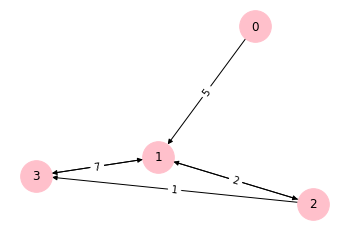

In [ ]:
Adj = np.asarray([[0, 5, 0, 0],[0, 0, 2, 7],[0, 2, 0, 1],[0, 7, 0, 0]]) #Zero means no edge between nodes
G = nx.DiGraph()
N = Adj.shape[0]
for i in range(N):
  G.add_node(i)
for i in range(N):
  for j in range(N):
    if Adj[i,j] > 0:
      G.add_edges_from([(i, j)], weight=Adj[i,j])

print("Граф:")

pos=nx.spring_layout(G) 
edge_labels=dict([((u,v,),d['weight'])
                 for u,v,d in G.edges(data=True)]) 
nx.draw_networkx(G,pos,edge_labels=edge_labels, node_size = 1000, edge_color='black',width=1,linewidths=1,node_color='pink',alpha=1) 
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.axis('off')
plt.show()

#Dijkstra algorithm
distance = np.zeros(N) 
visited = np.ones(N) 
origin = int(input("Из вершины: "))
goal = int(input("В вершину: ")) 

visited[origin] = 0

pred = np.zeros(N)
pred[origin] = origin

for j in range(N):
  if Adj[origin,j] == 0 and origin != j: 
    distance[j] = 10e10
    pred[j] = -1
  else:
    distance[j] = Adj[origin,j]
    pred[j] = origin

while(np.sum(visited) > 0): 
  temp = np.copy(distance) 
  temp[visited == 0] = 10e10
  vmin = np.argmin(temp)
  visited[vmin] = 0
  for j in range(N):
    if Adj[vmin,j] > 0 and distance[j]>distance[vmin]+Adj[vmin,j]: 
      distance[j] = distance[vmin]+Adj[vmin,j]
      pred[j] = vmin

pred = pred.astype(int) #Minimum distance path from origin node to the others

#Plot path
previous = pred[goal]
path = [(previous, goal),(goal, previous)]
print("Минимальный путь из "+str(origin)+" до "+str(goal)+": "+str(goal)+" <-- "+str(previous), end="")
while(previous != origin):
  path.append((previous, pred[previous]))
  path.append((pred[previous], previous))
  previous = pred[previous]
  print(" <-- "+str(previous), end="")

edge_colors = ['black' if not edge in path else 'red' for edge in G.edges()]

pos=nx.spring_layout(G)
edge_labels=dict([((u,v,),d['weight'])
                 for u,v,d in G.edges(data=True)])
nx.draw_networkx(G,pos,edge_labels=edge_labels, node_size = 1000, width=1,linewidths=1,node_color='pink',alpha=1,edge_color=edge_colors)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.axis('off')
plt.show()